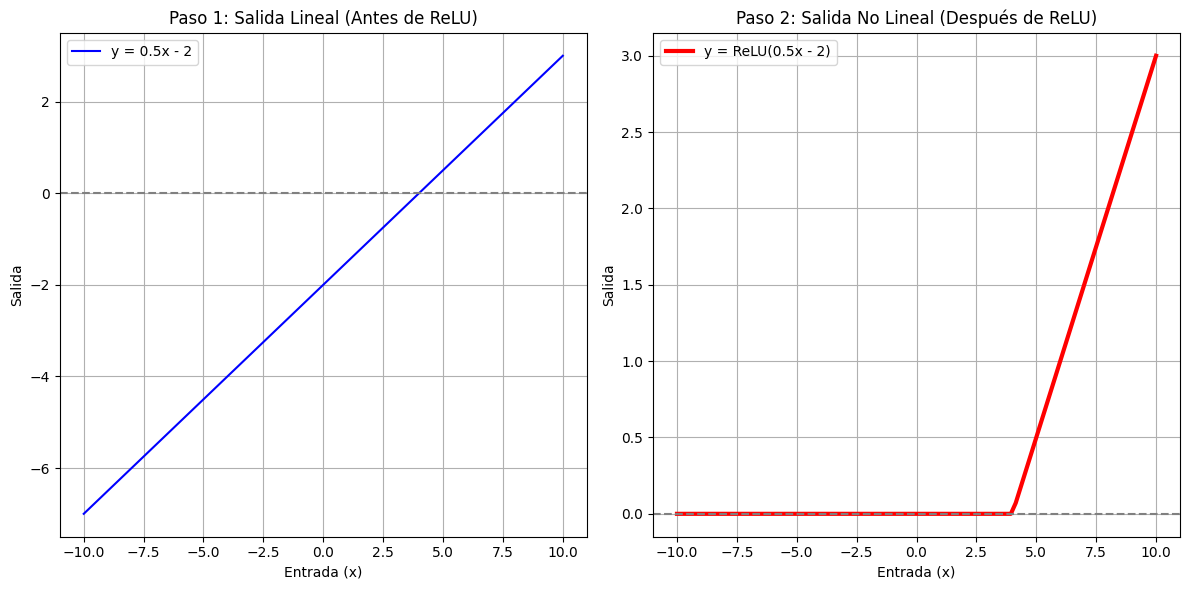

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# 1. Crear datos de entrada
# Generamos una secuencia de números desde -10 a 10.
# Esto nos dará un buen rango para ver el efecto de ReLU.
x = torch.linspace(-10, 10, 100) # Tensor de 100 puntos

# 2. Definir una transformación lineal simple (una "neurona")
# Vamos a simular una capa lineal manualmente para mayor claridad.
# w * x + b
# Imagina que la red ha aprendido estos pesos y sesgos.
w = torch.tensor(0.5)  # Peso (pendiente de la línea)
b = torch.tensor(-2.0) # Sesgo (desplazamiento vertical)

# Calculamos la salida lineal
# Esta es la salida ANTES de la función de activación.
y_linear = w * x + b

# 3. Aplicar la función de activación ReLU
# ReLU(z) = max(0, z)
# Todo lo que sea negativo en 'y_linear' se convertirá en 0.
y_relu = F.relu(y_linear)

# 4. Visualizar los resultados
# Convertimos los tensores a arrays de NumPy para poder graficarlos con Matplotlib
x_np = x.numpy()
y_linear_np = y_linear.numpy()
y_relu_np = y_relu.numpy()

plt.figure(figsize=(12, 6))

# Gráfico 1: Salida Lineal (antes de ReLU)
plt.subplot(1, 2, 1)
plt.plot(x_np, y_linear_np, label='y = 0.5x - 2', color='blue')
plt.title('Paso 1: Salida Lineal (Antes de ReLU)')
plt.xlabel('Entrada (x)')
plt.ylabel('Salida')
plt.axhline(0, color='gray', linestyle='--') # Línea en y=0 para referencia
plt.grid(True)
plt.legend()

# Gráfico 2: Salida después de aplicar ReLU
plt.subplot(1, 2, 2)
plt.plot(x_np, y_relu_np, label='y = ReLU(0.5x - 2)', color='red', linewidth=3)
plt.title('Paso 2: Salida No Lineal (Después de ReLU)')
plt.xlabel('Entrada (x)')
plt.ylabel('Salida')
plt.axhline(0, color='gray', linestyle='--') # Línea en y=0 para referencia
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

---
title: "El Poder de la No Linealidad: Por qué ReLU es Esencial en Redes Neuronales"
author: "Una Explicación Detallada"
date: "`r Sys.Date()`"
output: html_document
---

```{r setup, include=FALSE}
knitr::opts_chunk$set(echo = TRUE, warning = FALSE, message = FALSE)
```

### 1. El Problema de Usar Solo Capas Lineales

Imagina que tienes dos capas lineales, una después de la otra, sin nada en medio:

*   **Capa 1** (con pesos $W_1$ y sesgo $b_1$):
    $$ \text{salida}_1 = X \cdot W_1 + b_1 $$

*   **Capa 2** (con pesos $W_2$ y sesgo $b_2$):
    $$ \text{salida}_2 = \text{salida}_1 \cdot W_2 + b_2 $$

Si sustituimos la primera ecuación en la segunda, obtenemos:

$$ \text{salida}_2 = (X \cdot W_1 + b_1) \cdot W_2 + b_2 $$
$$ \text{salida}_2 = X \cdot (W_1 \cdot W_2) + (b_1 \cdot W_2 + b_2) $$

Ahora, observa esta ecuación final. $W_1$ y $W_2$ son matrices de números (pesos). Su producto ($W_1 \cdot W_2$) es simplemente **otra matriz de pesos**, llamémosla $W_{\text{nueva}}$. Del mismo modo, $b_1 \cdot W_2 + b_2$ es simplemente **otro vector de sesgos**, $b_{\text{nuevo}}$.

Entonces, la ecuación se simplifica a:

$$ \text{salida}_2 = X \cdot W_{\text{nueva}} + b_{\text{nuevo}} $$

**Conclusión clave:** ¡Apilar múltiples capas lineales es matemáticamente equivalente a tener **una sola capa lineal**! No importa cuántas capas lineales pongas, la función general seguirá siendo una línea, un plano o un hiperplano. No puedes crear una curva. *Es como intentar dibujar un círculo usando solo reglas rectas; no importa cuántas líneas pongas, nunca será un círculo perfecto.*

### 2. El Superpoder de ReLU (y otras funciones de activación)

Aquí es donde entra la magia de **ReLU** (*Rectified Linear Unit*). La función es increíblemente simple:

$$ \text{ReLU}(z) = \max(0, z) $$

- Si la entrada *z* es positiva, la salida es *z*.
- Si la entrada *z* es negativa, la salida es 0.


Parece muy simple, pero esa "esquina" en el cero es lo que introduce la **no linealidad**. Rompe la línea recta en dos partes.

### 3. Cómo ReLU y Dos Capas Crean No Linealidad (Analogía Intuitiva)

Pensemos en esto como si estuviéramos construyendo algo con piezas de LEGO.

- **Una capa lineal (`nn.Linear`):** Es como tener una sola pieza de LEGO recta e infinitamente larga. Puedes inclinarla (cambiando los pesos $W$) o moverla hacia arriba y abajo (cambiando el sesgo $b$), pero siempre será una línea recta.

- **Una capa lineal + ReLU:** Ahora, la función ReLU actúa como una **bisagra**. Te permite tomar tu pieza recta y "doblarla" en el punto cero. Ya no es una sola línea, sino dos segmentos de línea conectados en un ángulo. Uno es horizontal (pendiente cero) y el otro tiene la pendiente original.
  - *Una sola neurona con ReLU puede crear una "esquina".*

- **Dos capas lineales con ReLU en medio:** ¡Aquí es donde ocurre la magia!
    1.  **Primera Capa (`nn.Linear(1, 10)`):** Imagina que en lugar de una bisagra, ahora tienes **10 bisagras** (porque tenemos 10 neuronas en la capa oculta). Cada neurona aprende a colocar su "bisagra" en un lugar diferente de los datos. Cada una aprende una versión ligeramente diferente de la función $\text{ReLU}(w \cdot x + b)$.
    2.  **Función de Activación (`F.relu(...)`):** Cada una de las 10 salidas de la primera capa pasa por su propia función ReLU, creando 10 "líneas dobladas" diferentes.
    3.  **Segunda Capa (`nn.Linear(10, 1)`):** Esta capa final actúa como un **"maestro de obras"**. Su trabajo es tomar esas 10 líneas dobladas y sumarlas de manera ponderada. Al combinar (sumar y escalar) muchas "líneas con una esquina", ¡puedes aproximar cualquier curva!

Es como un artista que solo puede dibujar segmentos de línea recta. Si le das suficientes segmentos pequeños, puede crear una imagen que parece una curva suave.

#### Visualización del proceso:

-   *Datos Originales:* Una curva sinusoidal.
-   *Neuronas de la Capa Oculta:* Cada una aprende una función "ReLU" simple, que se activa en diferentes puntos.
    - *Cada color es la salida de una neurona en la capa oculta. Observa cómo cada una es una "línea doblada" en un lugar diferente.*
-   *Salida Final:* La capa final suma estas piezas para aproximar la curva original.
    - *La línea azul (salida final) es la suma ponderada de todas las líneas de colores. Al combinar suficientes "esquinas", se aproxima a la curva roja (los datos reales).*

### Resumen Final

-   **Capas Lineales solas:** Son insuficientes porque su combinación es siempre lineal.
-   **ReLU (y otras activaciones):** Introduce un "quiebre" o "doblez" no lineal. Es el componente que permite que la red deje de ser una simple línea.
-   **Múltiples Capas con Activaciones:** La primera capa crea un conjunto de "bloques de construcción" no lineales básicos (líneas dobladas). La siguiente capa aprende a combinar estos bloques para construir una función final mucho más compleja, capaz de ajustarse a casi cualquier patrón de datos.

Por eso, una red neuronal con al menos una capa oculta y una función de activación no lineal se conoce como un **aproximador universal**. Teóricamente, puede aproximar cualquier función continua con la suficiente cantidad de neuronas.

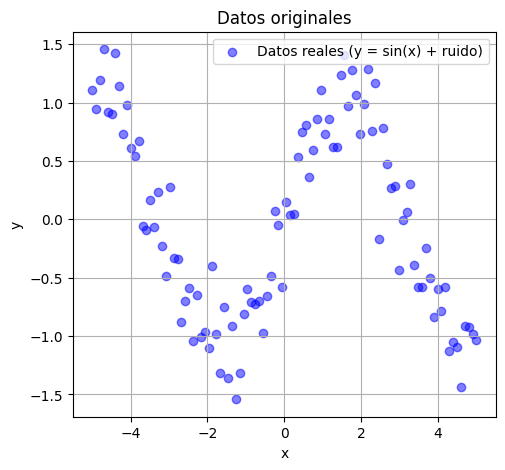

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


# ===== 1. Generación de datos (función no lineal + ruido) =====
np.random.seed(42)
X = np.linspace(-5, 5, 100).reshape(-1, 1)
y = np.sin(X) + 0.3 * np.random.randn(*X.shape)  # y = sin(x) + ruido


# Gráfico 1: Datos originales
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', alpha=0.5, label='Datos reales (y = sin(x) + ruido)')
plt.title("Datos originales")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()

In [ ]:
# Convertir a tensores PyTorch
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [ ]:
class NonLinearModel(nn.Module):
    def __init__(self):
        super(NonLinearModel, self).__init__()
        # Capa 1: 1 entrada -> 10 neuronas ocultas
        self.layer1 = nn.Linear(1, 10)
        # Capa 2: 10 neuronas ocultas -> 1 salida
        self.layer2 = nn.Linear(10, 1)

    def forward(self, x):
        # Aplicamos la primera capa y luego la función de activación ReLU
        # ReLU(x) = max(0, x). Esta no linealidad es la clave.
        x = F.relu(self.layer1(x))
        # La capa de salida no necesita activación para regresión
        x = self.layer2(x)
        return x

In [ ]:
model = NonLinearModel()

# ===== 3. Configuración del entrenamiento =====
criterion = nn.MSELoss()  # Función de pérdida
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Optimizador

# ===== 4. Entrenamiento =====
epochs = 1000
loss_history = []

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# ===== 5. Visualización =====
with torch.no_grad():
    predictions = model(X_tensor).numpy()

Epoch [100/1000], Loss: 0.2278
Epoch [200/1000], Loss: 0.0893
Epoch [300/1000], Loss: 0.0760
Epoch [400/1000], Loss: 0.0758
Epoch [500/1000], Loss: 0.0757
Epoch [600/1000], Loss: 0.0756
Epoch [700/1000], Loss: 0.0755
Epoch [800/1000], Loss: 0.0752
Epoch [900/1000], Loss: 0.0749
Epoch [1000/1000], Loss: 0.0747


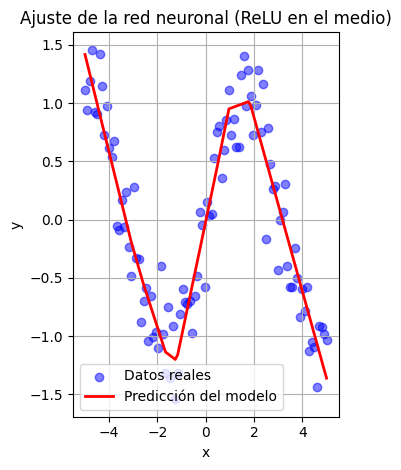

In [ ]:
# Gráfico 2: Ajuste del modelo
plt.subplot(1, 2, 2)
plt.scatter(X, y, color='blue', alpha=0.5, label='Datos reales')
plt.plot(X, predictions, color='red', linewidth=2, label='Predicción del modelo')
plt.title("Ajuste de la red neuronal (ReLU en el medio)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Miremos las capas intermedias

Arquitectura del Modelo con ReLU:
NonLinearModel(
  (layer1): Linear(in_features=1, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=1, bias=True)
)

Entrenando el modelo...
Epoch [100/1000], Loss: 0.1066
Epoch [200/1000], Loss: 0.0189
Epoch [300/1000], Loss: 0.0129
Epoch [400/1000], Loss: 0.0113
Epoch [500/1000], Loss: 0.0109
Epoch [600/1000], Loss: 0.0107
Epoch [700/1000], Loss: 0.0106
Epoch [800/1000], Loss: 0.0106
Epoch [900/1000], Loss: 0.0106
Epoch [1000/1000], Loss: 0.0106

Inspeccionando las salidas intermedias y finales...


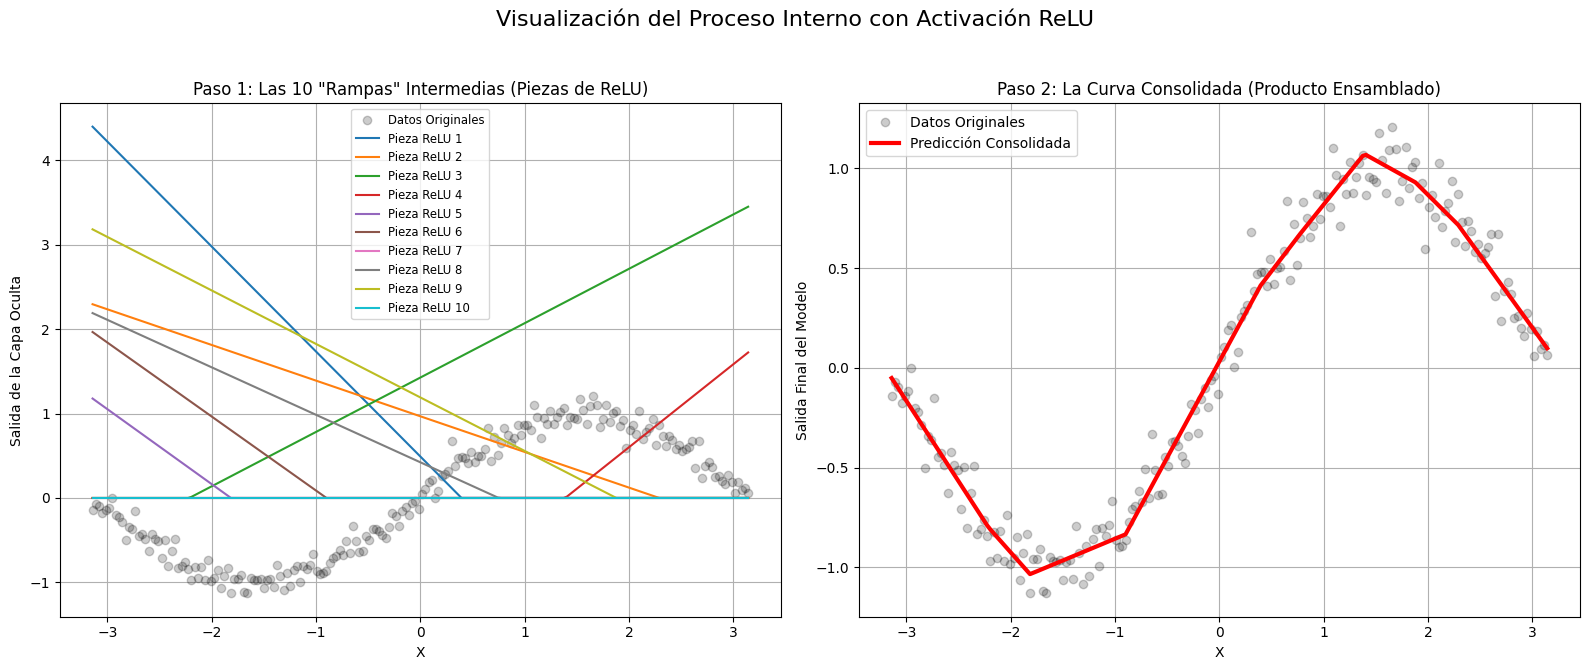

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# ===== 1. Generación de Datos =====
# Datos con una relación sinusoidal y algo de ruido
X = np.linspace(-np.pi, np.pi, 200)
y = np.sin(X) + 0.1 * np.random.randn(200)

# Conversión a tensores de PyTorch
X_tensor = torch.from_numpy(X.astype(np.float32)).view(-1, 1)
y_tensor = torch.from_numpy(y.astype(np.float32)).view(-1, 1)


# ===== 2. Definición del Modelo =====
class NonLinearModel(nn.Module):
    def __init__(self):
        super(NonLinearModel, self).__init__()
        # Capa 1: 1 entrada -> 10 neuronas ocultas
        self.layer1 = nn.Linear(1, 10)
        # Capa 2: 10 neuronas ocultas -> 1 salida
        self.layer2 = nn.Linear(10, 1)

    def forward(self, x):
        # Aplicamos la primera capa y luego la función de activación ReLU
        # ReLU(x) = max(0, x). Esta no linealidad es la clave.
        pieces = F.relu(self.layer1(x))
        # La capa de salida no necesita activación para regresión
        output = self.layer2(pieces)
        return output

model = NonLinearModel()
print("Arquitectura del Modelo con ReLU:")
print(model)

# ===== 3. Configuración del entrenamiento =====
criterion = nn.MSELoss()  # Función de pérdida
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Optimizador

# ===== 4. Entrenamiento =====
print("\nEntrenando el modelo...")
epochs = 1000
loss_history = []

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# ===== 5. Visualización Avanzada =====
print("\nInspeccionando las salidas intermedias y finales...")
model.eval()
with torch.no_grad():
    # Para obtener las piezas intermedias, replicamos el forward paso a paso
    # Paso 1: Obtenemos la salida de la capa oculta (las 10 "rampas" de ReLU)
    intermediate_pieces_relu = F.relu(model.layer1(X_tensor))

    # Paso 2: Obtenemos la predicción final a partir de esas piezas
    final_prediction_relu = model.layer2(intermediate_pieces_relu)

# Creamos una figura con dos subplots
plt.figure(figsize=(16, 7))

# Subplot 1: Las 10 "rampas" intermedias de ReLU
plt.subplot(1, 2, 1)
plt.plot(X_tensor.numpy(), y_tensor.numpy(), 'ko', label='Datos Originales', alpha=0.2)
for i in range(10):
    plt.plot(X_tensor.numpy(), intermediate_pieces_relu[:, i].numpy(), '-', label=f'Pieza ReLU {i+1}')
plt.title('Paso 1: Las 10 "Rampas" Intermedias (Piezas de ReLU)')
plt.xlabel('X')
plt.ylabel('Salida de la Capa Oculta')
plt.legend(fontsize='small')
plt.grid(True)

# Subplot 2: La predicción final consolidada
plt.subplot(1, 2, 2)
plt.plot(X_tensor.numpy(), y_tensor.numpy(), 'ko', label='Datos Originales', alpha=0.2)
plt.plot(X_tensor.numpy(), final_prediction_relu.numpy(), 'r-', label='Predicción Consolidada', linewidth=3)
plt.title('Paso 2: La Curva Consolidada (Producto Ensamblado)')
plt.xlabel('X')
plt.ylabel('Salida Final del Modelo')
plt.legend()
plt.grid(True)

plt.suptitle('Visualización del Proceso Interno con Activación ReLU', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Una de las dudas más comunes al empezar con redes neuronales es sobre la terminología para contar las capas.

> Si tengo una arquitectura `Lineal -> ReLU -> Lineal`, ¿se considera una red con **una** capa oculta o una red con **tres** capas?

La respuesta correcta según la convención estándar en deep learning es:

**Es una red con UNA capa oculta (o capa intermedia).**

En total, se considera una red de **dos capas** (una oculta y una de salida).

### La Regla General: ¿Qué se cuenta como una "capa"?

La regla de oro en la comunidad de deep learning es la siguiente:

> **Contamos las capas que tienen parámetros que se aprenden (pesos y sesgos).**

La función de activación (`ReLU`, `Tanh`, etc.) no tiene parámetros propios que aprender; es una transformación matemática fija. Por lo tanto, no se cuenta como una capa separada, sino como **parte de la capa anterior**.

### Desglose de la Arquitectura: `Lineal -> ReLU -> Lineal`

Vamos a aplicar la regla a tu modelo componente por componente:

1.  **Primera `nn.Linear` (`self.layer1`)**:
    -   ¿Tiene parámetros aprendibles? **Sí** (los pesos `W1` y el sesgo `b1`).
    -   **SE CUENTA COMO LA CAPA 1.**
    -   Esta es tu **capa oculta** o **capa intermedia**.

2.  **`F.relu()`**:
    -   ¿Tiene parámetros aprendibles? **No**. Es solo la operación `max(0, z)`.
    -   **NO SE CUENTA COMO UNA CAPA SEPARADA.** Se considera la función de activación *de* la capa 1.

3.  **Segunda `nn.Linear` (`self.layer2`)**:
    -   ¿Tiene parámetros aprendibles? **Sí** (los pesos `W2` y el sesgo `b2`).
    -   **SE CUENTA COMO LA CAPA 2.**
    -   Esta es tu **capa de salida**.

### La Confusión Común: La "Capa de Entrada"

A veces, en diagramas teóricos, verás que la propia entrada de datos se dibuja como una "capa de entrada". En la práctica de frameworks como PyTorch o TensorFlow, esto no se hace. La "capa de entrada" son simplemente los datos que alimentas al modelo. La **primera capa real** es la primera transformación con parámetros que se aplica a esos datos.

### Tabla Resumen

| Componente | ¿Tiene Parámetros? | ¿Se cuenta como capa? | Nombre Común |
| :--- | :--- | :--- | :--- |
| Datos de Entrada (`X`) | No | No | Capa de Entrada (en teoría) |
| `nn.Linear(1, 10)` | **Sí** | **Sí (Capa 1)** | **Capa Oculta / Intermedia** |
| `F.relu()` | No | No | Activación de la Capa Oculta |
| `nn.Linear(10, 1)` | **Sí** | **Sí (Capa 2)** | **Capa de Salida** |

**Conclusión final:**

Cuando alguien dice que está usando una "red neuronal de una capa oculta" (*a one-hidden-layer neural network*), se está refiriendo exactamente a la arquitectura `Lineal -> Activación -> Lineal`. No es una red de tres capas.


Una observación increíblemente perspicaz al ver las "piezas" que genera una capa oculta con activación ReLU es la siguiente:

> Si las "piezas" de ReLU (las rampas de colores) solo pueden ser positivas (mayores o iguales a cero), ¿cómo diablos puede la red producir la parte negativa de la onda seno?

La respuesta, y el secreto de todo el sistema, no está en las piezas mismas, sino en **cómo la segunda capa lineal (el "maestro de obras") las combina.**

### El Poder de los Pesos Negativos

La segunda capa lineal (`self.layer2 = nn.Linear(10, 1)`) no hace una simple suma. Hace una **SUMA PONDERADA**. La fórmula es:

$$ \text{salida}_{\text{final}} = \sum_{i=1}^{10} (w_i \cdot \text{pieza}_i) + b_{\text{final}} $$

La clave es que los pesos ($w_1, w_2, \dots, w_{10}$) que aprende esta capa pueden ser **TANTO POSITIVOS COMO NEGATIVOS**.

-   Un **peso positivo** significa: *"Usa esta pieza para sumar, para construir hacia arriba"*.
-   Un **peso negativo** significa: *"Invierte esta pieza y úsala para **RESTAR**, para construir hacia abajo"*.

### Análisis del Gráfico en la Parte Izquierda (ej: en x = -2)

1.  **Observa las rampas:** En la zona izquierda del gráfico, las rampas que están "activas" (tienen un valor mayor que cero) son principalmente las que tienen pendiente negativa (la azul, naranja, marrón, etc.). Las rampas con pendiente positiva (la verde, la roja) valen cero en esta zona.

2.  **El objetivo:** La red sabe que en esta zona (para $x$ negativos), la onda seno (los puntos grises) es negativa. Necesita producir un resultado negativo.

3.  **La estrategia de la red:** La capa de salida (`layer2`) ha aprendido lo siguiente durante el entrenamiento:
    > "Cuando veo que las rampas con pendiente negativa (azul, naranja, etc.) están activas, sé que estoy en la parte izquierda del gráfico. Para producir un valor negativo, debo tomar estas rampas (que tienen valores positivos) y multiplicarlas por **pesos negativos**."

#### Veamos un cálculo hipotético para $x = -2$:

*   **Salida de las rampas (aproximado desde el gráfico):**
    -   Pieza 1 (azul): $\approx 3.5$
    -   Pieza 2 (naranja): $\approx 2.0$
    -   Pieza 4 (verde): $0$
    -   ... y así sucesivamente.

*   **Pesos aprendidos por la capa de salida (hipotéticos):**
    -   Peso para Pieza 1 ($w_1$): $-0.5$ (¡Negativo!)
    -   Peso para Pieza 2 ($w_2$): $-0.4$ (¡Negativo!)
    -   Peso para Pieza 4 ($w_4$): $+0.8$ (Positivo, pero no importa porque la pieza vale 0)
    -   ... etc.

*   **Cálculo de la salida final (simplificado):**
    $$ \text{salida} \approx (w_1 \cdot 3.5) + (w_2 \cdot 2.0) + (w_4 \cdot 0) + \dots $$
    $$ \text{salida} \approx (-0.5 \cdot 3.5) + (-0.4 \cdot 2.0) + (0.8 \cdot 0) + \dots $$
    $$ \text{salida} \approx -1.75 - 0.8 + 0 + \dots = -2.55 \dots $$

Al sumar todas las contribuciones ponderadas (muchas de las cuales son negativas en esta zona), la red puede generar perfectamente un valor final negativo.

# Que pasa si no tengo capas ocultas intermedios?

Se necesita como mínimo **dos capas lineales con una activación no lineal entre ellas** para que el modelo pueda aprender funciones complejas y no lineales. Esto crea una estructura que a menudo se describe como un "sándwich": `Lineal -> No-Lineal -> Lineal`.

Una sugerencia alternativa podría ser invertir el orden (`ReLU -> Capa Lineal`), pero esta arquitectura no funcionaría para crear la no linealidad flexible que buscamos. Vamos a analizar por qué.

### ¿Por qué la arquitectura `ReLU -> Capa Lineal` no es suficiente?

Consideremos la arquitectura propuesta paso a paso:

1.  **Entrada:** $x$
2.  **Aplicar ReLU:** $\text{salida}_{\text{relu}} = \text{ReLU}(x)$
3.  **Pasar por una capa lineal:** $\text{salida}_{\text{final}} = \text{salida}_{\text{relu}} \cdot W + b$

Desglosemos lo que sucede en este flujo:

-   La entrada $x$ es un tensor de números.
-   Al aplicar $\text{ReLU}(x)$, simplemente estamos poniendo a cero todos los valores negativos de la entrada original. **No hay aprendizaje en este paso**. No hay pesos ($W$) ni sesgos ($b$) involucrados. Es una transformación fija y predefinida.
-   Luego, esta nueva entrada modificada ($\text{salida}_{\text{relu}}$) se pasa a una única capa lineal.

El problema fundamental es que la red solo tiene **un conjunto de parámetros aprendibles** ($W$ y $b$ en la capa final). Por lo tanto, lo único que puede aprender es una **transformación lineal** de la entrada que ya ha sido modificada por ReLU.

> Piénsalo así: Estás tomando tus datos, cortando la parte negativa, y luego intentando ajustar una línea recta a lo que queda. Esto es muy poco flexible. No tienes la capacidad de "combinar" múltiples "líneas dobladas", que es lo que da la verdadera potencia a una red neuronal.

Arquitectura incorrecta (ReLU -> Lineal con 10 neuronas):
IncorrectModelMultiNeuron(
  (layer): Linear(in_features=1, out_features=10, bias=True)
)

Entrenando el modelo...
Epoch [200/1000], Loss: 0.2860


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([200, 1])) that is different to the input size (torch.Size([200, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [400/1000], Loss: 0.2856
Epoch [600/1000], Loss: 0.2856
Epoch [800/1000], Loss: 0.2856
Epoch [1000/1000], Loss: 0.2856

Visualizando las 10 salidas independientes del modelo...


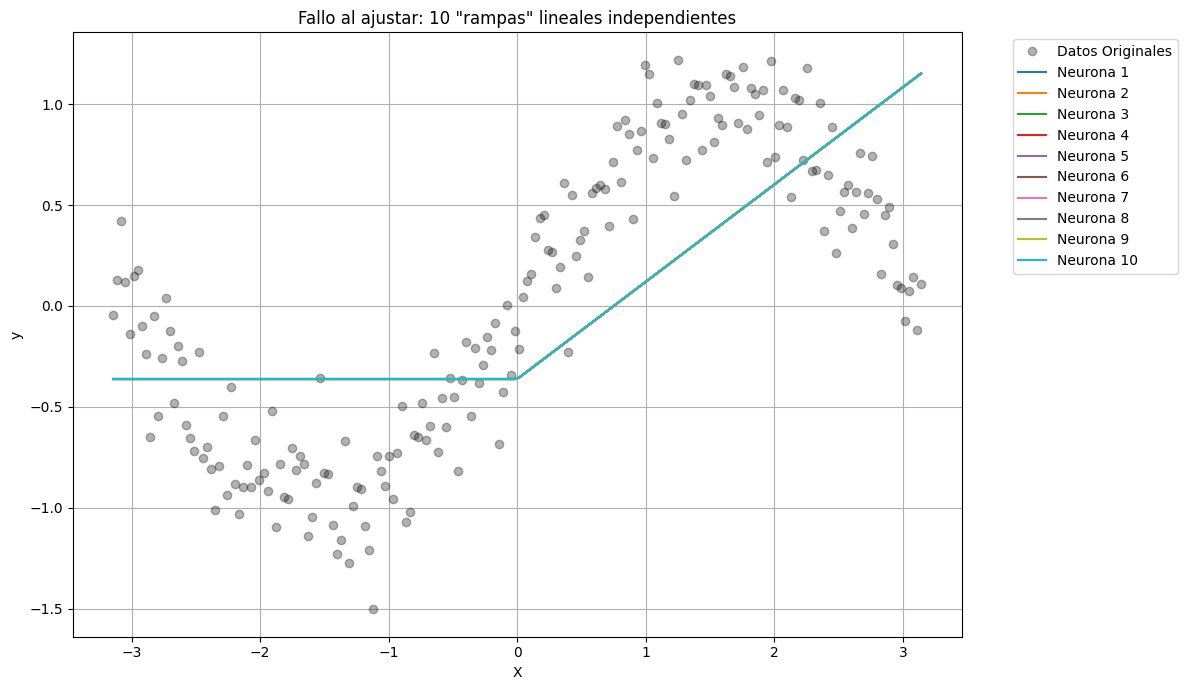

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# Usamos los mismos datos no lineales de antes
X_nonlinear = torch.linspace(-np.pi, np.pi, 200).view(-1, 1)
y_nonlinear = torch.sin(X_nonlinear) + 0.2 * torch.randn(X_nonlinear.size())

# --- ARQUITECTURA INCORRECTA con 10 Neuronas ---
# ReLU primero, luego una capa lineal con 10 salidas.
class IncorrectModelMultiNeuron(nn.Module):
    def __init__(self):
        super().__init__()
        # La capa lineal ahora produce 10 salidas independientes
        self.layer = nn.Linear(1, 10)

    def forward(self, x):
        # 1. Aplicamos ReLU a la entrada original
        x_relu = F.relu(x)
        # 2. Pasamos el resultado por la capa lineal.
        # La salida tendrá una forma de [num_muestras, 10]
        output = self.layer(x_relu)
        return output

model_incorrecto = IncorrectModelMultiNeuron()
print("Arquitectura incorrecta (ReLU -> Lineal con 10 neuronas):")
print(model_incorrecto)

# Entrenamos este modelo para ver qué aprende
optimizer = torch.optim.Adam(model_incorrecto.parameters(), lr=0.02)
loss_function = nn.MSELoss()

print("\nEntrenando el modelo...")
for epoch in range(1000):
    # y_pred tendrá 10 columnas de predicciones
    y_pred = model_incorrecto(X_nonlinear)

    # La función de pérdida intentará que CADA UNA de las 10 predicciones
    # se parezca al objetivo y_nonlinear.
    loss = loss_function(y_pred, y_nonlinear)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (epoch + 1) % 200 == 0:
        print(f'Epoch [{epoch+1}/1000], Loss: {loss.item():.4f}')

# Visualizamos el resultado de CADA neurona
print("\nVisualizando las 10 salidas independientes del modelo...")
model_incorrecto.eval()
with torch.no_grad():
    predicted_outputs = model_incorrecto(X_nonlinear)

plt.figure(figsize=(12, 7))
# Graficamos los datos originales como referencia
plt.plot(X_nonlinear.numpy(), y_nonlinear.numpy(), 'ko', label='Datos Originales', alpha=0.3)

# Ahora, graficamos la salida de cada una de las 10 neuronas
for i in range(10):
    plt.plot(X_nonlinear.numpy(), predicted_outputs[:, i].numpy(), '-', label=f'Neurona {i+1}')

plt.title('Fallo al ajustar: 10 "rampas" lineales independientes')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


### La arquitectura `Lineal -> ReLU` es insuficiente por sí misma

La respuesta es **no**, la arquitectura `Lineal -> ReLU` tampoco es suficiente por sí misma.

> Aunque es un paso en la dirección correcta, es como tener todas las piezas de un motor pero no haberlas ensamblado. Vamos a ver por qué.

#### ¿Qué hace la arquitectura `Lineal -> ReLU`?

El flujo de datos en este modelo es el siguiente:

1.  **Entrada:** $x$
2.  **Capa Lineal:**
    $$ \text{salida}_{\text{lineal}} = x \cdot W_1 + b_1 $$
3.  **Activación ReLU:**
    $$ \text{salida}_{\text{final}} = \text{ReLU}(\text{salida}_{\text{lineal}}) $$

Esta estructura es, de hecho, lo que se conoce como una **capa oculta** (*a hidden layer*). Es el bloque de construcción fundamental de las redes neuronales profundas.

Veamos qué tipo de función puede representar este modelo:

*   **Caso A: Una neurona (`nn.Linear(1, 1)`)**
    Si la capa lineal tiene una sola neurona de salida, el resultado es una única "línea doblada" o "rampa". Puede aprender una pendiente ($W_1$) y un punto de quiebre ($b_1$), pero eso es todo. Es más flexible que una simple línea recta, pero no puede aproximar una función compleja como una sinusoide.

*   **Caso B: Múltiples neuronas (`nn.Linear(1, 10)`)**
    Si la capa lineal tiene 10 neuronas, la salida del modelo será un conjunto de **10 "líneas dobladas" independientes**.

El problema es que **ahí termina el proceso**. El modelo te da como resultado estas 10 piezas, pero no hay un paso final que aprenda a **combinarlas** para formar una única curva compleja que se ajuste a tus datos `y`.

## Otra arquitectura incompleta

Arquitectura de la 'Fábrica de Piezas':
PieceFactoryModel(
  (hidden_layer): Linear(in_features=1, out_features=10, bias=True)
)

Entrenando el modelo...
Epoch [200/1000], Loss: 0.4464


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([200, 1])) that is different to the input size (torch.Size([200, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([200, 1])) that is different to the input size (torch.Size([200, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [400/1000], Loss: 0.4463
Epoch [600/1000], Loss: 0.4463
Epoch [800/1000], Loss: 0.4463
Epoch [1000/1000], Loss: 0.4463

Visualizando las 10 salidas independientes del modelo...


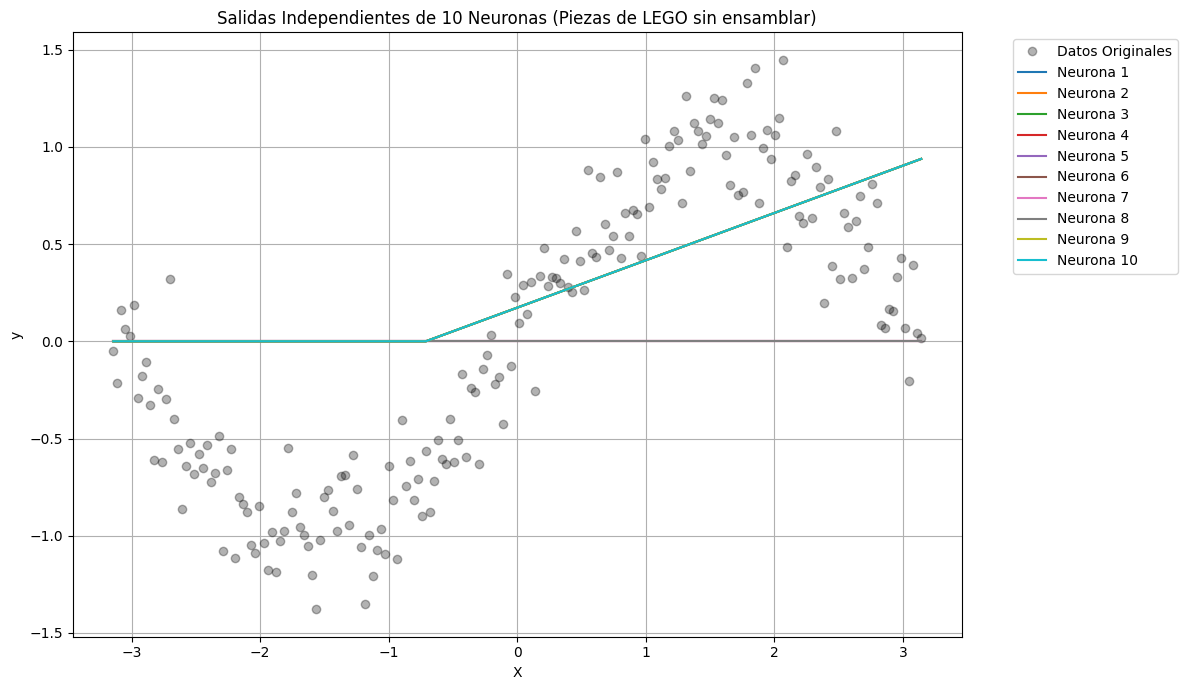

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# 1. GENERACIÓN DE DATOS NO LINEALES (los mismos de antes)
X_nonlinear = torch.linspace(-np.pi, np.pi, 200).view(-1, 1)
y_nonlinear = torch.sin(X_nonlinear) + 0.2 * torch.randn(X_nonlinear.size())

# 2. DEFINICIÓN DEL MODELO INCOMPLETO con 10 neuronas
# Arquitectura: Lineal(1 -> 10) -> ReLU
class PieceFactoryModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Definimos una capa lineal que toma 1 entrada y produce 10 salidas
        # Cada una de estas 10 salidas será una "pieza de LEGO" potencial.
        self.hidden_layer = nn.Linear(1, 10)

    def forward(self, x):
        # Aplicamos la capa lineal y luego ReLU
        # La salida de este modelo tendrá una forma de [num_muestras, 10]
        pieces = F.relu(self.hidden_layer(x))
        return pieces

model_pieces = PieceFactoryModel()
print("Arquitectura de la 'Fábrica de Piezas':")
print(model_pieces)

# 3. ENTRENAMIENTO
# Aunque el modelo es incorrecto para la tarea, podemos entrenarlo.
# La función de pérdida intentará que CADA UNA de las 10 salidas se parezca a 'y'.
optimizer = torch.optim.Adam(model_pieces.parameters(), lr=0.01)
loss_function = nn.MSELoss()

print("\nEntrenando el modelo...")
for epoch in range(1000):
    # El modelo produce 10 salidas para cada entrada
    predicted_pieces = model_pieces(X_nonlinear)

    # PyTorch usa broadcasting para comparar las [200, 10] predicciones
    # con el objetivo de [200, 1].
    loss = loss_function(predicted_pieces, y_nonlinear)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (epoch + 1) % 200 == 0:
        print(f'Epoch [{epoch+1}/1000], Loss: {loss.item():.4f}')

# 4. VISUALIZACIÓN DE LAS PIEZAS
print("\nVisualizando las 10 salidas independientes del modelo...")
model_pieces.eval()
with torch.no_grad():
    # Obtenemos las 10 "piezas" predichas
    final_pieces = model_pieces(X_nonlinear)

plt.figure(figsize=(12, 7))
# Primero, graficamos los datos originales
plt.plot(X_nonlinear.numpy(), y_nonlinear.numpy(), 'ko', label='Datos Originales', alpha=0.3)

# Ahora, graficamos CADA UNA de las 10 salidas como una línea separada
for i in range(10):
    # Extraemos la i-ésima columna, que corresponde a la salida de la i-ésima neurona
    plt.plot(X_nonlinear.numpy(), final_pieces[:, i].numpy(), '-', label=f'Neurona {i+1}')

plt.title('Salidas Independientes de 10 Neuronas (Piezas de LEGO sin ensamblar)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Leyenda fuera del gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

import torch.nn as nn

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()

        self.num_salidas_capa1 = 5  # Número de neuronas en la capa 1

        self.layer1 = nn.Linear(1, self.num_salidas_capa1)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(self.num_salidas_capa1, 1)  # Salida escalar

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

# Funcion de activacion tanh

In [ ]:

model = SimpleNN()

# ===== 3. Configuración del entrenamiento =====
criterion = nn.MSELoss()  # Función de pérdida
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Optimizador

# ===== 4. Entrenamiento =====
epochs = 1000
loss_history = []

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# ===== 5. Visualización =====
with torch.no_grad():
    predictions = model(X_tensor).numpy()

Arquitectura de la 'Fábrica de Piezas' con Tanh:
TanhPieceFactory(
  (hidden_layer): Linear(in_features=1, out_features=10, bias=True)
)


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([200, 1])) that is different to the input size (torch.Size([200, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([200, 1])) that is different to the input size (torch.Size([200, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


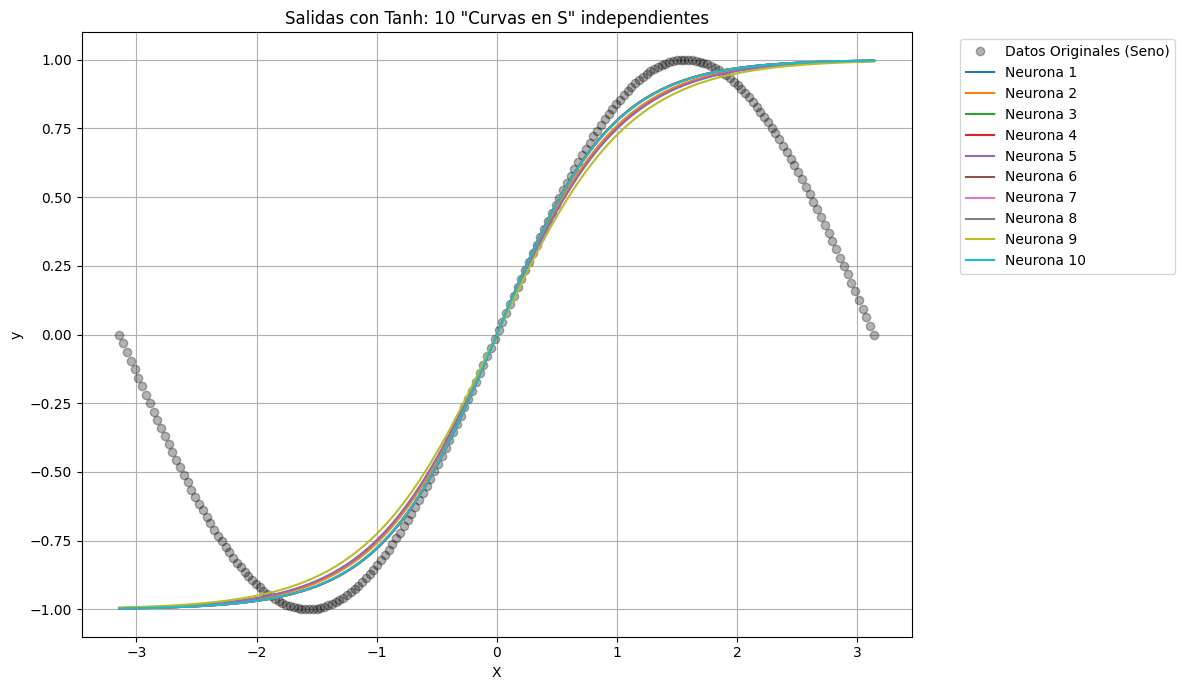

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Datos no lineales
X_nonlinear = torch.linspace(-np.pi, np.pi, 200).view(-1, 1)
y_nonlinear = torch.sin(X_nonlinear)

# Modelo "Fábrica de Piezas" usando Tanh
class TanhPieceFactory(nn.Module):
    def __init__(self):
        super().__init__()
        # Capa lineal que produce 10 salidas
        self.hidden_layer = nn.Linear(1, 10)

    def forward(self, x):
        # Aplicamos la capa lineal y luego la activación Tanh
        # ¡Esta es la única diferencia con el ejemplo de ReLU!
        pieces = torch.tanh(self.hidden_layer(x))
        return pieces

model_tanh_pieces = TanhPieceFactory()
print("Arquitectura de la 'Fábrica de Piezas' con Tanh:")
print(model_tanh_pieces)

# Entrenamiento
optimizer = torch.optim.Adam(model_tanh_pieces.parameters(), lr=0.01)
loss_function = nn.MSELoss()

for epoch in range(1000):
    predicted_pieces = model_tanh_pieces(X_nonlinear)
    loss = loss_function(predicted_pieces, y_nonlinear)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

# Visualización
model_tanh_pieces.eval()
with torch.no_grad():
    final_pieces = model_tanh_pieces(X_nonlinear)

plt.figure(figsize=(12, 7))
plt.plot(X_nonlinear.numpy(), y_nonlinear.numpy(), 'ko', label='Datos Originales (Seno)', alpha=0.3)

# Graficamos cada una de las 10 "piezas en S"
for i in range(10):
    plt.plot(X_nonlinear.numpy(), final_pieces[:, i].numpy(), '-', label=f'Neurona {i+1}')

plt.title('Salidas con Tanh: 10 "Curvas en S" independientes')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

La razón por la que obtienes 10 curvas y no una consolidada es porque el modelo, tal como lo diseñamos, no tiene un paso final para consolidarlas.


**La Arquitectura Completa: El "Ensamblador"**
* Capa Oculta (Lineal -> Tanh): Esta es la "fábrica" que produce 10 piezas no lineales.
* Capa de Salida (Lineal): Este es el "ensamblador" o "consolidador" que toma las 10 piezas y las combina en una única salida.

Arquitectura del Modelo Completo:
ConsolidatedModel(
  (hidden_layer): Linear(in_features=1, out_features=10, bias=True)
  (output_layer): Linear(in_features=10, out_features=1, bias=True)
)

Entrenando el modelo completo...
Epoch [200/1000], Loss: 0.0248
Epoch [400/1000], Loss: 0.0026
Epoch [600/1000], Loss: 0.0008
Epoch [800/1000], Loss: 0.0003
Epoch [1000/1000], Loss: 0.0001

Visualizando la predicción consolidada...


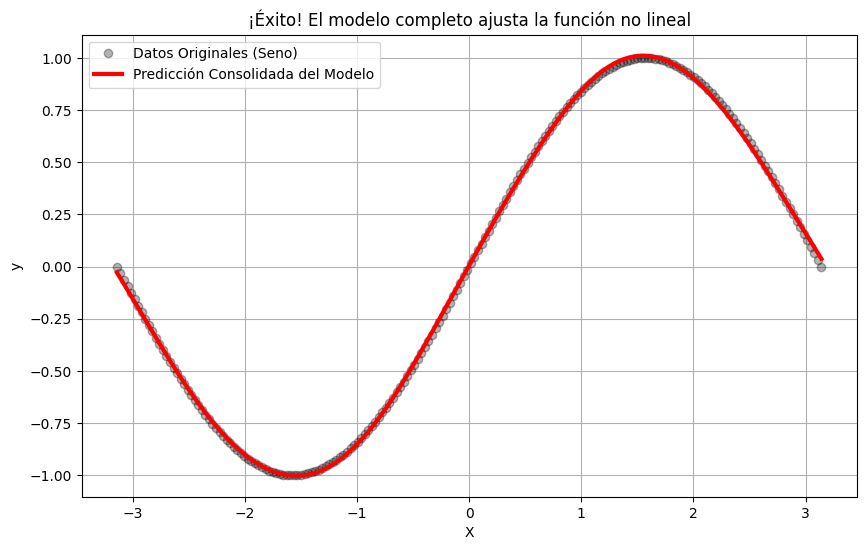

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Datos no lineales
X_nonlinear = torch.linspace(-np.pi, np.pi, 200).view(-1, 1)
y_nonlinear = torch.sin(X_nonlinear)

# --- MODELO COMPLETO Y CORRECTO ---
# Arquitectura: Lineal(1->10) -> Tanh -> Lineal(10->1)
class ConsolidatedModel(nn.Module):
    def __init__(self):
        super().__init__()
        # 1. La "Fábrica de Piezas" (Capa Oculta)
        # Toma 1 entrada y crea 10 características no lineales.
        self.hidden_layer = nn.Linear(1, 10)

        # 2. ✅ ¡LA PIEZA QUE FALTABA! El "Ensamblador" (Capa de Salida)
        # Toma las 10 características de la capa oculta y las consolida en 1 salida final.
        self.output_layer = nn.Linear(10, 1)

    def forward(self, x):
        # Paso 1: Crear las 10 piezas no lineales (con forma de "S")
        pieces = torch.tanh(self.hidden_layer(x))

        # Paso 2: Consolidar las 10 piezas en una única predicción
        # La capa de salida aprende la combinación lineal ponderada correcta.
        consolidated_output = self.output_layer(pieces)

        return consolidated_output

model_complete = ConsolidatedModel()
print("Arquitectura del Modelo Completo:")
print(model_complete)

# Entrenamiento
optimizer = torch.optim.Adam(model_complete.parameters(), lr=0.01)
loss_function = nn.MSELoss()

print("\nEntrenando el modelo completo...")
for epoch in range(1000):
    # y_pred ahora tendrá una forma de [200, 1]
    y_pred = model_complete(X_nonlinear)

    loss = loss_function(y_pred, y_nonlinear)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (epoch + 1) % 200 == 0:
        print(f'Epoch [{epoch+1}/1000], Loss: {loss.item():.4f}')

# Visualización
print("\nVisualizando la predicción consolidada...")
model_complete.eval()
with torch.no_grad():
    # La predicción final es una única curva
    final_prediction = model_complete(X_nonlinear)

plt.figure(figsize=(10, 6))
plt.plot(X_nonlinear.numpy(), y_nonlinear.numpy(), 'ko', label='Datos Originales (Seno)', alpha=0.3)
plt.plot(X_nonlinear.numpy(), final_prediction.numpy(), 'r-', label='Predicción Consolidada del Modelo', linewidth=3)
plt.title('¡Éxito! El modelo completo ajusta la función no lineal')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

COmo funcionan las capas intermedias?

Arquitectura del Modelo Completo:
ConsolidatedModel(
  (hidden_layer): Linear(in_features=1, out_features=10, bias=True)
  (output_layer): Linear(in_features=10, out_features=1, bias=True)
)

Entrenando el modelo completo...
Epoch [200/1000], Loss: 0.0150
Epoch [400/1000], Loss: 0.0012
Epoch [600/1000], Loss: 0.0001
Epoch [800/1000], Loss: 0.0000
Epoch [1000/1000], Loss: 0.0000

Inspeccionando las salidas intermedias y finales...


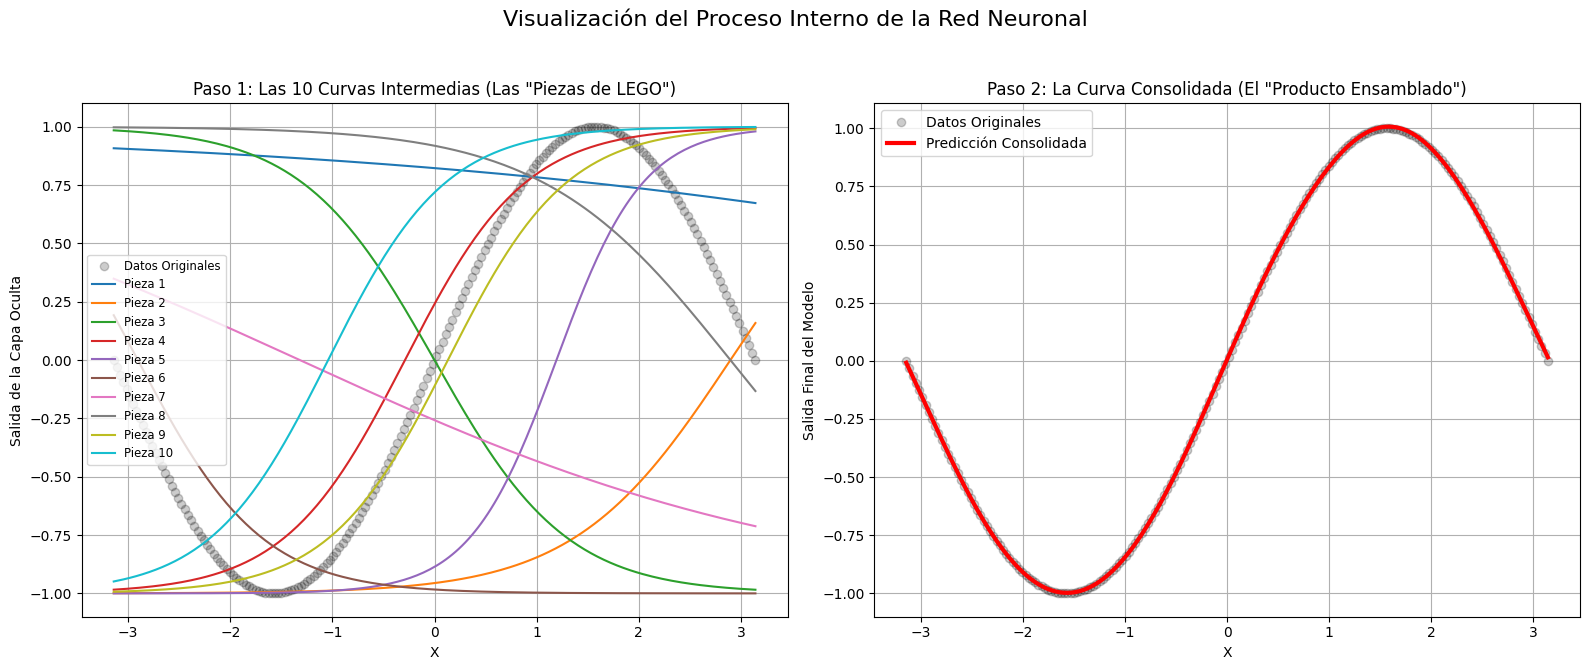

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Datos no lineales
X_nonlinear = torch.linspace(-np.pi, np.pi, 200).view(-1, 1)
y_nonlinear = torch.sin(X_nonlinear)

# --- MODELO COMPLETO Y CORRECTO ---
# Arquitectura: Lineal(1->10) -> Tanh -> Lineal(10->1)
class ConsolidatedModel(nn.Module):
    def __init__(self):
        super().__init__()
        # 1. La "Fábrica de Piezas" (Capa Oculta)
        self.hidden_layer = nn.Linear(1, 10)

        # 2. El "Ensamblador" (Capa de Salida)
        self.output_layer = nn.Linear(10, 1)

    def forward(self, x):
        # Paso 1: Crear las 10 piezas no lineales (con forma de "S")
        pieces = torch.tanh(self.hidden_layer(x))

        # Paso 2: Consolidar las 10 piezas en una única predicción
        consolidated_output = self.output_layer(pieces)

        return consolidated_output

model_complete = ConsolidatedModel()
print("Arquitectura del Modelo Completo:")
print(model_complete)

# Entrenamiento
optimizer = torch.optim.Adam(model_complete.parameters(), lr=0.01)
loss_function = nn.MSELoss()

print("\nEntrenando el modelo completo...")
for epoch in range(1000):
    y_pred = model_complete(X_nonlinear)
    loss = loss_function(y_pred, y_nonlinear)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (epoch + 1) % 200 == 0:
        print(f'Epoch [{epoch+1}/1000], Loss: {loss.item():.4f}')

# --- VISUALIZACIÓN AVANZADA: INSPECCIONANDO LAS CAPAS ---
print("\nInspeccionando las salidas intermedias y finales...")
model_complete.eval()
with torch.no_grad():
    # Para obtener las piezas intermedias, hacemos el forward "manualmente"
    # Paso 1: Obtenemos la salida de la capa oculta (las 10 piezas)
    intermediate_pieces = torch.tanh(model_complete.hidden_layer(X_nonlinear))

    # Paso 2: Obtenemos la predicción final a partir de esas piezas
    final_prediction = model_complete.output_layer(intermediate_pieces)

# Creamos una figura con dos subplots uno al lado del otro
plt.figure(figsize=(16, 7))

# Subplot 1: Las 10 curvas intermedias
plt.subplot(1, 2, 1)
plt.plot(X_nonlinear.numpy(), y_nonlinear.numpy(), 'ko', label='Datos Originales', alpha=0.2)
for i in range(10):
    plt.plot(X_nonlinear.numpy(), intermediate_pieces[:, i].numpy(), '-', label=f'Pieza {i+1}')
plt.title('Paso 1: Las 10 Curvas Intermedias (Las "Piezas de LEGO")')
plt.xlabel('X')
plt.ylabel('Salida de la Capa Oculta')
plt.legend(fontsize='small')
plt.grid(True)

# Subplot 2: La predicción final consolidada
plt.subplot(1, 2, 2)
plt.plot(X_nonlinear.numpy(), y_nonlinear.numpy(), 'ko', label='Datos Originales', alpha=0.2)
plt.plot(X_nonlinear.numpy(), final_prediction.numpy(), 'r-', label='Predicción Consolidada', linewidth=3)
plt.title('Paso 2: La Curva Consolidada (El "Producto Ensamblado")')
plt.xlabel('X')
plt.ylabel('Salida Final del Modelo')
plt.legend()
plt.grid(True)

plt.suptitle('Visualización del Proceso Interno de la Red Neuronal', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Regresion logistica

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

# ===== CARGA Y PREPARACIÓN DE DATOS =====

# 1. Cargar el dataset Iris
iris = load_iris()
X, y = iris.data, iris.target

print(f"Forma de los datos (X): {X.shape}") # 150 muestras, 4 características
print(f"Forma de las etiquetas (y): {y.shape}") # 150 etiquetas
print(f"Clases únicas: {np.unique(y)}") # 0, 1, 2 (3 tipos de flores)

# 2. Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Escalar las características
# Es crucial escalar los datos para que el gradiente descendente funcione bien.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # Usamos el mismo scaler ajustado en el entrenamiento

# 4. Convertir a tensores de PyTorch
X_train_tensor = torch.from_numpy(X_train.astype(np.float32))
X_test_tensor = torch.from_numpy(X_test.astype(np.float32))
# Las etiquetas para clasificación deben ser de tipo Long (entero de 64 bits)
y_train_tensor = torch.from_numpy(y_train).type(torch.LongTensor)
y_test_tensor = torch.from_numpy(y_test).type(torch.LongTensor)

Forma de los datos (X): (150, 4)
Forma de las etiquetas (y): (150,)
Clases únicas: [0 1 2]


In [ ]:
# ===== EJEMPLO 1: CAMBIANDO LA MÉTRICA =====

print("\n--- Ejemplo 1: Regresión Logística con diferentes métricas ---")

# 1. Definición del Modelo
# Una capa lineal que toma 4 entradas (features) y produce 3 salidas (logits para cada clase)
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4, 3)

    def forward(self, x):
        # El modelo devuelve los "logits" (puntuaciones crudas)
        # NO aplicamos Softmax aquí.
        return self.linear(x)

model1 = LogisticRegressionModel()

# 2. Función de Pérdida y Optimizador
# nn.CrossEntropyLoss es la elección estándar para clasificación multiclase.
# IMPORTANTE: Esta función internamente aplica LogSoftmax + NLLLoss.
# Por eso no debemos poner una activación Softmax en nuestro modelo.
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model1.parameters(), lr=0.1)

# 3. Entrenamiento
epochs = 200
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model1(X_train_tensor) # Predicciones (logits)
    loss = criterion(outputs, y_train_tensor) # Calcular pérdida
    loss.backward() # Calcular gradientes
    optimizer.step() # Actualizar pesos

print("Entrenamiento del Modelo 1 completado.")

# 4. Evaluación del Modelo
model1.eval() # Poner el modelo en modo de evaluación
with torch.no_grad(): # No necesitamos gradientes para evaluar
    # Obtener las predicciones en el conjunto de prueba
    test_outputs = model1(X_test_tensor)

    # torch.max devuelve el valor máximo y su índice.
    # Nos quedamos con el índice [1], que es la clase predicha.
    _, predicted_labels = torch.max(test_outputs.data, 1)

    # ----- MÉTRICA 1: PRECISIÓN (ACCURACY) -----
    total = y_test_tensor.size(0)
    correct = (predicted_labels == y_test_tensor).sum().item()
    accuracy = 100 * correct / total
    print(f'\nMétrica 1 - Precisión (Accuracy) en el test: {accuracy:.2f} %')

    # ----- MÉTRICA 2: F1-SCORE -----
    # F1-Score es útil para clases desbalanceadas.
    # Usamos scikit-learn para calcularlo, convirtiendo los tensores a numpy.
    y_test_np = y_test_tensor.numpy()
    predicted_labels_np = predicted_labels.numpy()

    # 'macro' calcula la métrica para cada clase y encuentra su media sin ponderar.
    f1 = f1_score(y_test_np, predicted_labels_np, average='macro')
    print(f'Métrica 2 - F1-Score (Macro) en el test: {f1:.4f}')


--- Ejemplo 1: Regresión Logística con diferentes métricas ---
Entrenamiento del Modelo 1 completado.

Métrica 1 - Precisión (Accuracy) en el test: 86.67 %
Métrica 2 - F1-Score (Macro) en el test: 0.8653


# Cambiando la Función de Activación (y la Pérdida)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# ===== 1. CARGA Y PREPARACIÓN DE DATOS (CLASIFICACIÓN BINARIA) =====

# Cargar el dataset de cáncer de mama
data = load_breast_cancer()
X, y = data.data, data.target

print(f"Forma de los datos (X): {X.shape}") # 569 muestras, 30 características
print(f"Forma de las etiquetas (y): {y.shape}")
print(f"Clases únicas: {np.unique(y)}") # 0 (maligno), 1 (benigno)

# Dividir y escalar los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertir a tensores de PyTorch
X_train_tensor = torch.from_numpy(X_train.astype(np.float32))
X_test_tensor = torch.from_numpy(X_test.astype(np.float32))
# Para BCELoss, las etiquetas también deben ser float y tener la misma forma que la salida
y_train_tensor = torch.from_numpy(y_train.astype(np.float32)).view(-1, 1)
y_test_tensor = torch.from_numpy(y_test.astype(np.float32)).view(-1, 1)


# ===== 2. MODELO CON ACTIVACIÓN SIGMOIDE ("ilogit") =====

print("\n--- Ejemplo de Regresión Logística Binaria Clásica ---")

# 1. Definición del Modelo con Activación Sigmoide
class BinaryLogisticRegression(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        # La capa lineal toma las 'num_features' de entrada y produce 1 única salida (logit)
        self.linear = nn.Linear(num_features, 1)

    def forward(self, x):
        logits = self.linear(x)
        # ✅ Aplicamos la función sigmoide (ilogit) para convertir el logit en una probabilidad (0 a 1)
        probabilities = torch.sigmoid(logits)
        return probabilities

# El número de características de entrada es el número de columnas en X
num_features = X.shape[1]
model_binary = BinaryLogisticRegression(num_features)
print(f"Modelo: {model_binary}")

# 2. Función de Pérdida y Optimizador para Clasificación Binaria
# BCELoss (Binary Cross-Entropy Loss) es la pareja de la activación Sigmoide.
criterion = nn.BCELoss()
optimizer = optim.SGD(model_binary.parameters(), lr=0.1)

# 3. Entrenamiento
epochs = 200
for epoch in range(epochs):
    optimizer.zero_grad()

    # El modelo devuelve probabilidades
    y_predicted_probs = model_binary(X_train_tensor)

    # Calculamos la pérdida entre las probabilidades predichas y las etiquetas reales (0 o 1)
    loss = criterion(y_predicted_probs, y_train_tensor)

    loss.backward()
    optimizer.step()

    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

print("Entrenamiento completado.")

# 4. Evaluación del Modelo
model_binary.eval()
with torch.no_grad():
    # Obtenemos las probabilidades predichas en el conjunto de prueba
    test_probs = model_binary(X_test_tensor)

    # Para obtener las etiquetas de clase, aplicamos un umbral de 0.5
    # Si la probabilidad es > 0.5, predecimos 1 (benigno), de lo contrario 0 (maligno).
    predicted_labels = (test_probs > 0.5).float()

    accuracy = accuracy_score(y_test_tensor, predicted_labels)
    print(f'\nPrecisión del Modelo Binario Clásico en el test: {accuracy*100:.2f} %')

Forma de los datos (X): (569, 30)
Forma de las etiquetas (y): (569,)
Clases únicas: [0 1]

--- Ejemplo de Regresión Logística Binaria Clásica ---
Modelo: BinaryLogisticRegression(
  (linear): Linear(in_features=30, out_features=1, bias=True)
)
Epoch [50/200], Loss: 0.1255
Epoch [100/200], Loss: 0.0978
Epoch [150/200], Loss: 0.0863
Epoch [200/200], Loss: 0.0796
Entrenamiento completado.

Precisión del Modelo Binario Clásico en el test: 98.25 %
